# 데이터 전처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
tf.random.set_seed(2)

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("/content/drive/MyDrive/2022_1_컴퓨터시스템/과제/과제2/train_santander.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)  
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [4]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [6]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [7]:
print(cust_df.iloc[0, :-1])

ID                             1.00
var3                           2.00
var15                         23.00
imp_ent_var16_ult1             0.00
imp_op_var39_comer_ult1        0.00
                             ...   
saldo_medio_var44_hace2        0.00
saldo_medio_var44_hace3        0.00
saldo_medio_var44_ult1         0.00
saldo_medio_var44_ult3         0.00
var38                      39205.17
Name: 0, Length: 370, dtype: float64


In [8]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999,2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


## 전처리 추가 내용
* StandardScaler를 적용하여 데이터의 범위를 동일하게 적용

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # StandardScaler 적용
scaler.fit(X_features)

X_features.describe( ) # StandardScaler가 잘 적용됨을 확인할 수 있음

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04
mean,2.716483,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05
std,9.447971,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,31.879418,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,7331.340000,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


# 변수 중요도 판별

## DecisionTreeClassifier(max_depth=3)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

model1 = DecisionTreeClassifier(max_depth=3, random_state=42) # max_depth=3
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print('DecisionTreeClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

DecisionTreeClassifier: 95.83


[Text(0.5, 0.875, 'X[182] <= 2.955\ngini = 0.075\nsamples = 60816\nvalue = [58442, 2374]'),
 Text(0.25, 0.625, 'X[1] <= 27.5\ngini = 0.158\nsamples = 17062\nvalue = [15584, 1478]'),
 Text(0.125, 0.375, 'X[368] <= 56980.395\ngini = 0.043\nsamples = 8928\nvalue = [8730, 198]'),
 Text(0.0625, 0.125, 'gini = 0.104\nsamples = 1186\nvalue = [1121, 65]'),
 Text(0.1875, 0.125, 'gini = 0.034\nsamples = 7742\nvalue = [7609, 133]'),
 Text(0.375, 0.375, 'X[368] <= 117321.207\ngini = 0.265\nsamples = 8134\nvalue = [6854, 1280]'),
 Text(0.3125, 0.125, 'gini = 0.296\nsamples = 6168\nvalue = [5056, 1112]'),
 Text(0.4375, 0.125, 'gini = 0.156\nsamples = 1966\nvalue = [1798, 168]'),
 Text(0.75, 0.625, 'X[1] <= 26.5\ngini = 0.04\nsamples = 43754\nvalue = [42858, 896]'),
 Text(0.625, 0.375, 'X[278] <= 21.0\ngini = 0.012\nsamples = 19702\nvalue = [19584, 118]'),
 Text(0.5625, 0.125, 'gini = 0.012\nsamples = 19701\nvalue = [19584, 117]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Tex

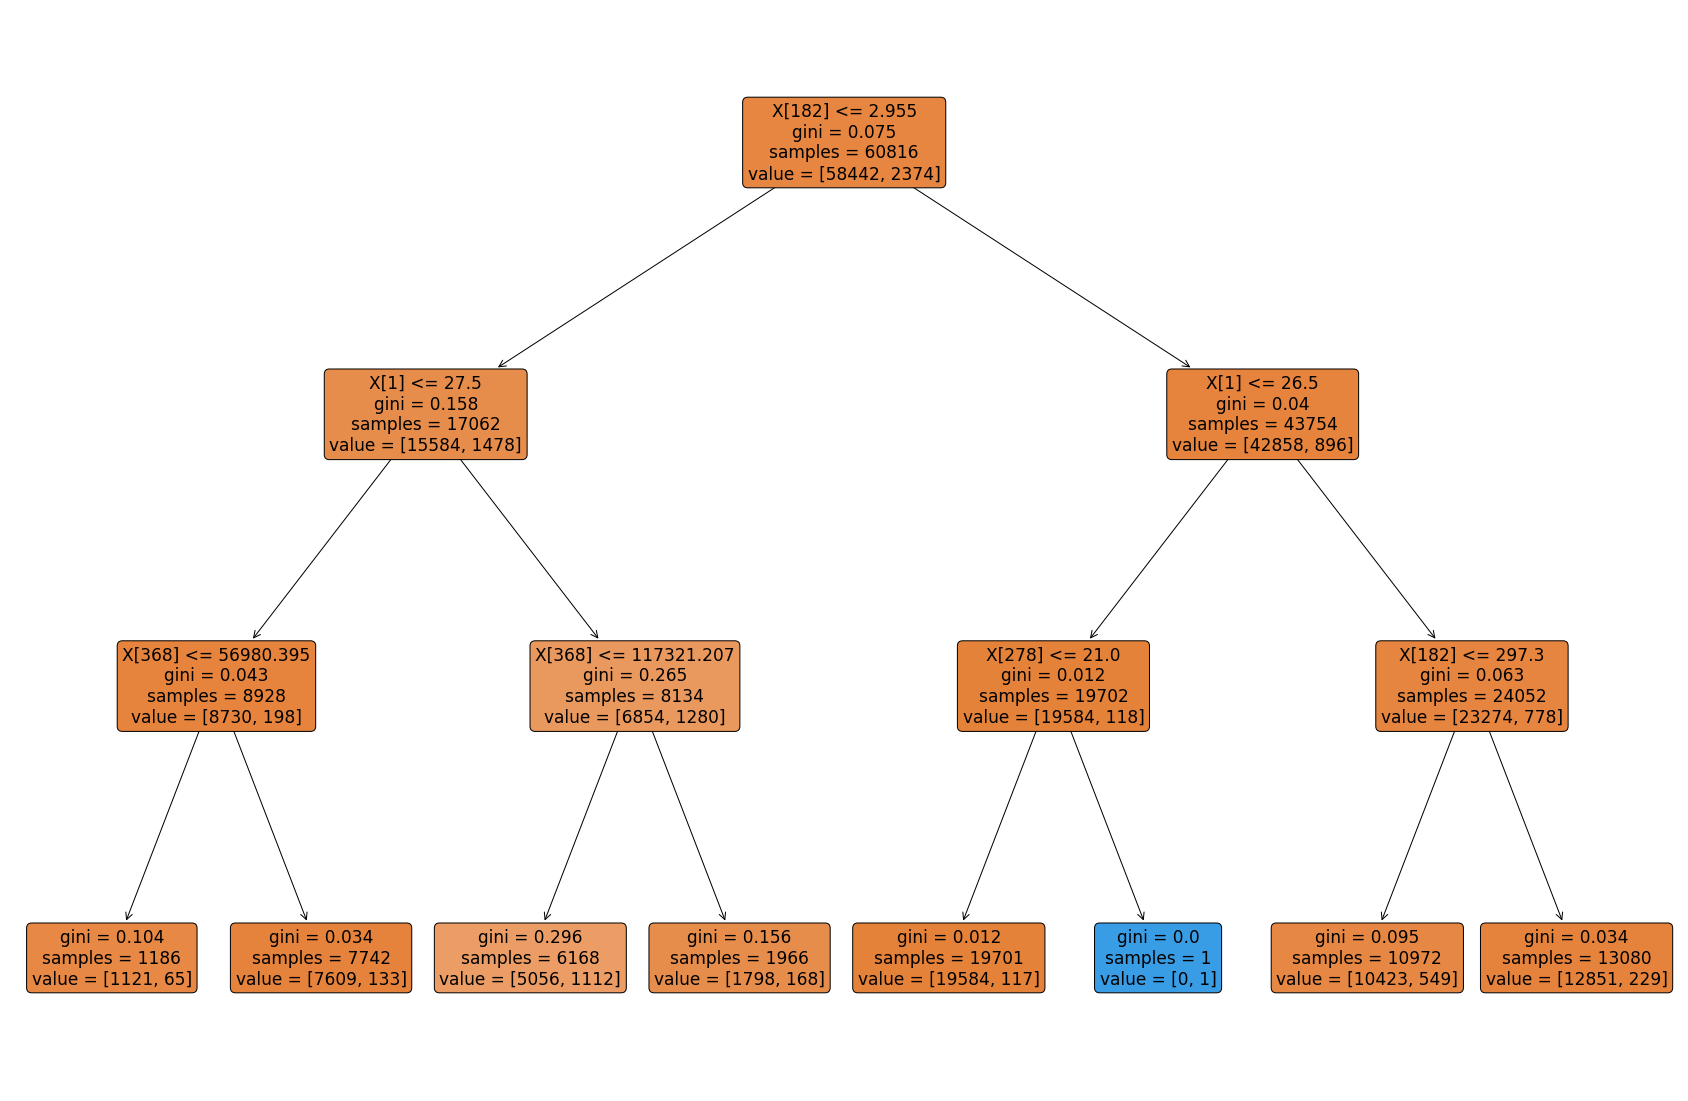

In [12]:
# 결정트리 규칙 시각화

from sklearn import tree

plt.figure( figsize=(30,20) )
tree.plot_tree(model1, 
              #  class_names=cust_df.target_names,
              #  feature_names=cust_df.feature_names,
               impurity=True, filled=True,
               rounded=True) 

* 중요 feature index : 1, 182, 278, 368

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


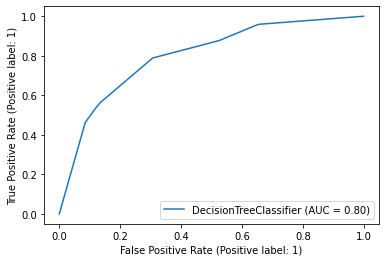

In [13]:
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_roc_curve 

plot_roc_curve(model1, X_test, y_test)  
plt.show()  

## DecisionTreeClassifier(max_depth=5)

In [14]:
model2 = DecisionTreeClassifier(max_depth=5, random_state=42) # max_depth=5
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print('DecisionTreeClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

DecisionTreeClassifier: 95.80


[Text(0.5182291666666666, 0.9166666666666666, 'X[182] <= 2.955\ngini = 0.075\nsamples = 60816\nvalue = [58442, 2374]'),
 Text(0.2864583333333333, 0.75, 'X[1] <= 27.5\ngini = 0.158\nsamples = 17062\nvalue = [15584, 1478]'),
 Text(0.15625, 0.5833333333333334, 'X[368] <= 56980.395\ngini = 0.043\nsamples = 8928\nvalue = [8730, 198]'),
 Text(0.08333333333333333, 0.4166666666666667, 'X[1] <= 24.5\ngini = 0.104\nsamples = 1186\nvalue = [1121, 65]'),
 Text(0.041666666666666664, 0.25, 'X[368] <= 56945.459\ngini = 0.069\nsamples = 891\nvalue = [859, 32]'),
 Text(0.020833333333333332, 0.08333333333333333, 'gini = 0.067\nsamples = 890\nvalue = [859, 31]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.125, 0.25, 'X[275] <= 4.5\ngini = 0.199\nsamples = 295\nvalue = [262, 33]'),
 Text(0.10416666666666667, 0.08333333333333333, 'gini = 0.189\nsamples = 293\nvalue = [262, 31]'),
 Text(0.14583333333333334, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0

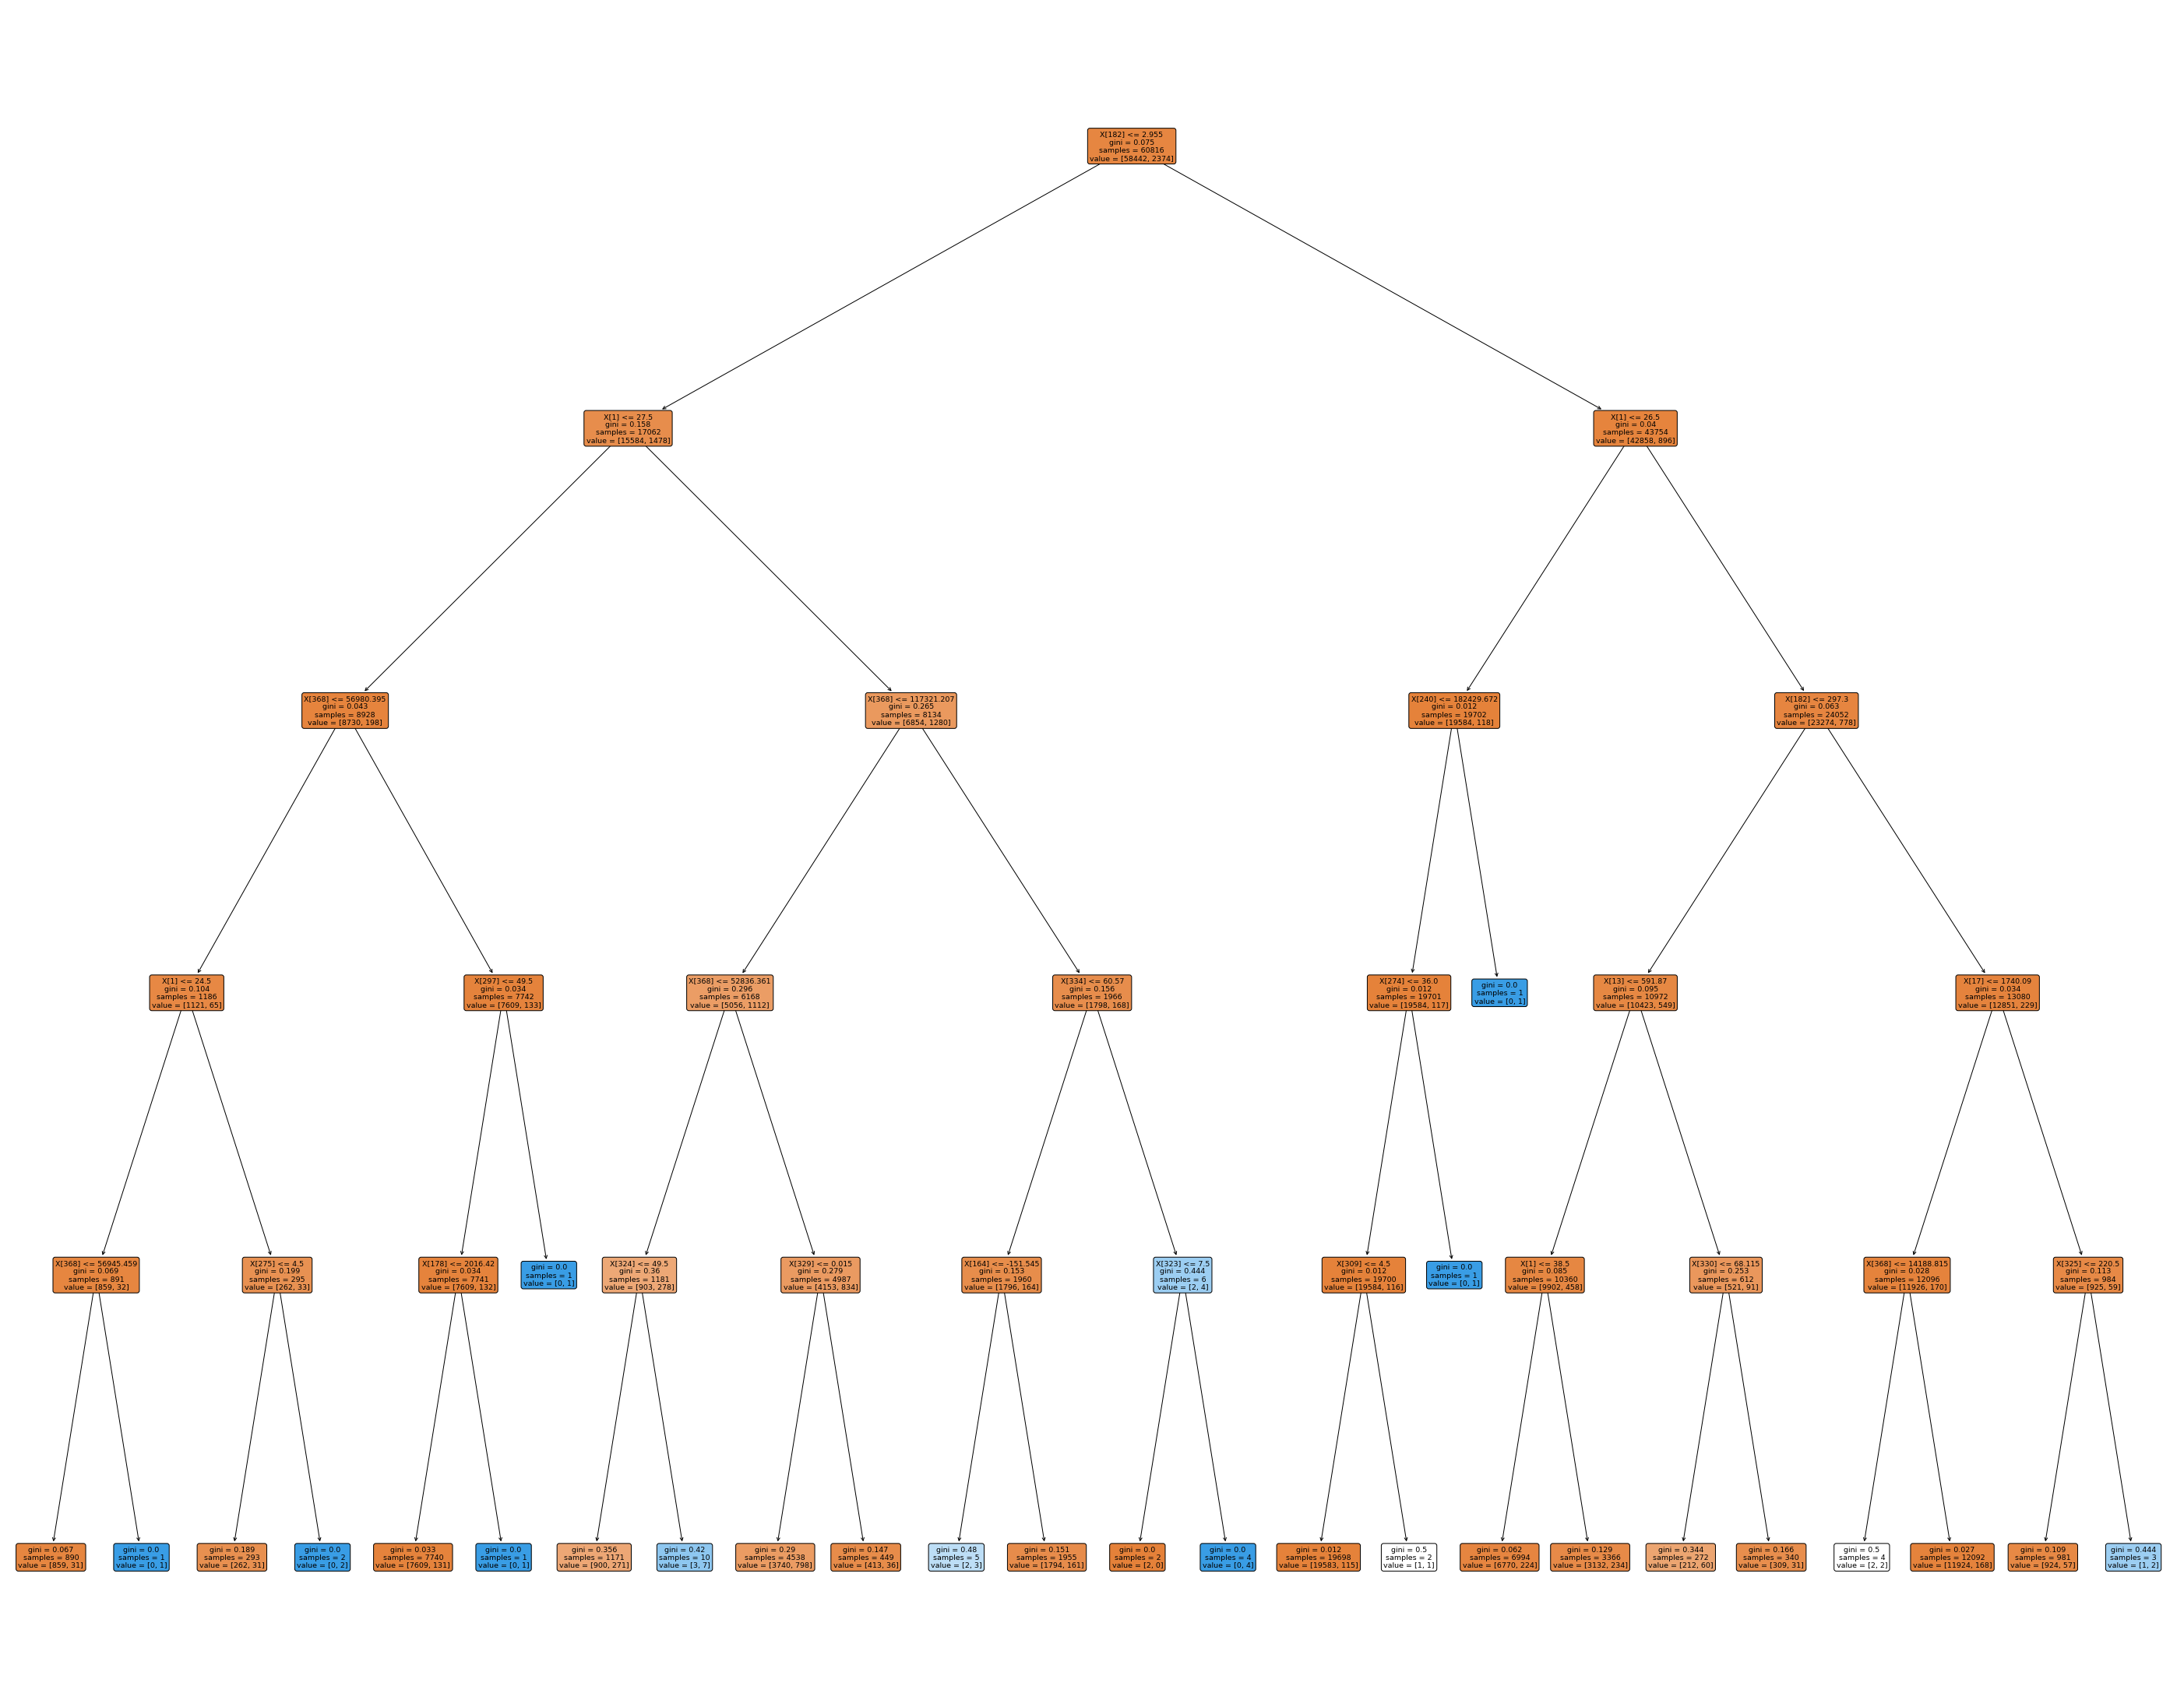

In [15]:
plt.figure( figsize=(50,40) )
tree.plot_tree(model2, 
              #  class_names=cust_df.target_names,
              #  feature_names=cust_df.feature_names,
               impurity=True, filled=True,
               rounded=True) 

* 중요 feature index : 1, 13, 164, 178, 182, 240, 274, 275, 297, 309, 323, 324, 325, 329, 330, 334, 368

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


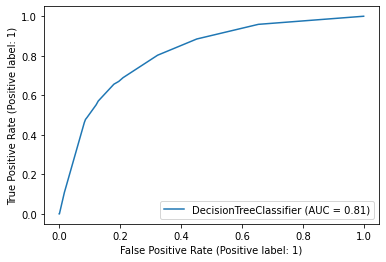

In [16]:
plot_roc_curve(model2, X_test, y_test)  
plt.show()  

## DecisionTreeClassifier(max_depth=7)

In [17]:
model3 = DecisionTreeClassifier(max_depth=7, random_state=42) # max_depth=7
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

print('DecisionTreeClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

DecisionTreeClassifier: 95.74


[Text(0.4629726890756303, 0.9375, 'X[182] <= 2.955\ngini = 0.075\nsamples = 60816\nvalue = [58442, 2374]'),
 Text(0.24054621848739496, 0.8125, 'X[1] <= 27.5\ngini = 0.158\nsamples = 17062\nvalue = [15584, 1478]'),
 Text(0.11134453781512606, 0.6875, 'X[368] <= 56980.395\ngini = 0.043\nsamples = 8928\nvalue = [8730, 198]'),
 Text(0.07142857142857142, 0.5625, 'X[1] <= 24.5\ngini = 0.104\nsamples = 1186\nvalue = [1121, 65]'),
 Text(0.04201680672268908, 0.4375, 'X[368] <= 56945.459\ngini = 0.069\nsamples = 891\nvalue = [859, 32]'),
 Text(0.03361344537815126, 0.3125, 'X[368] <= 13147.11\ngini = 0.067\nsamples = 890\nvalue = [859, 31]'),
 Text(0.01680672268907563, 0.1875, 'X[368] <= 12186.825\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.008403361344537815, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.025210084033613446, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05042016806722689, 0.1875, 'X[323] <= 27.0\ngini = 0.065\nsamples = 888\nvalue = [858, 30]'),

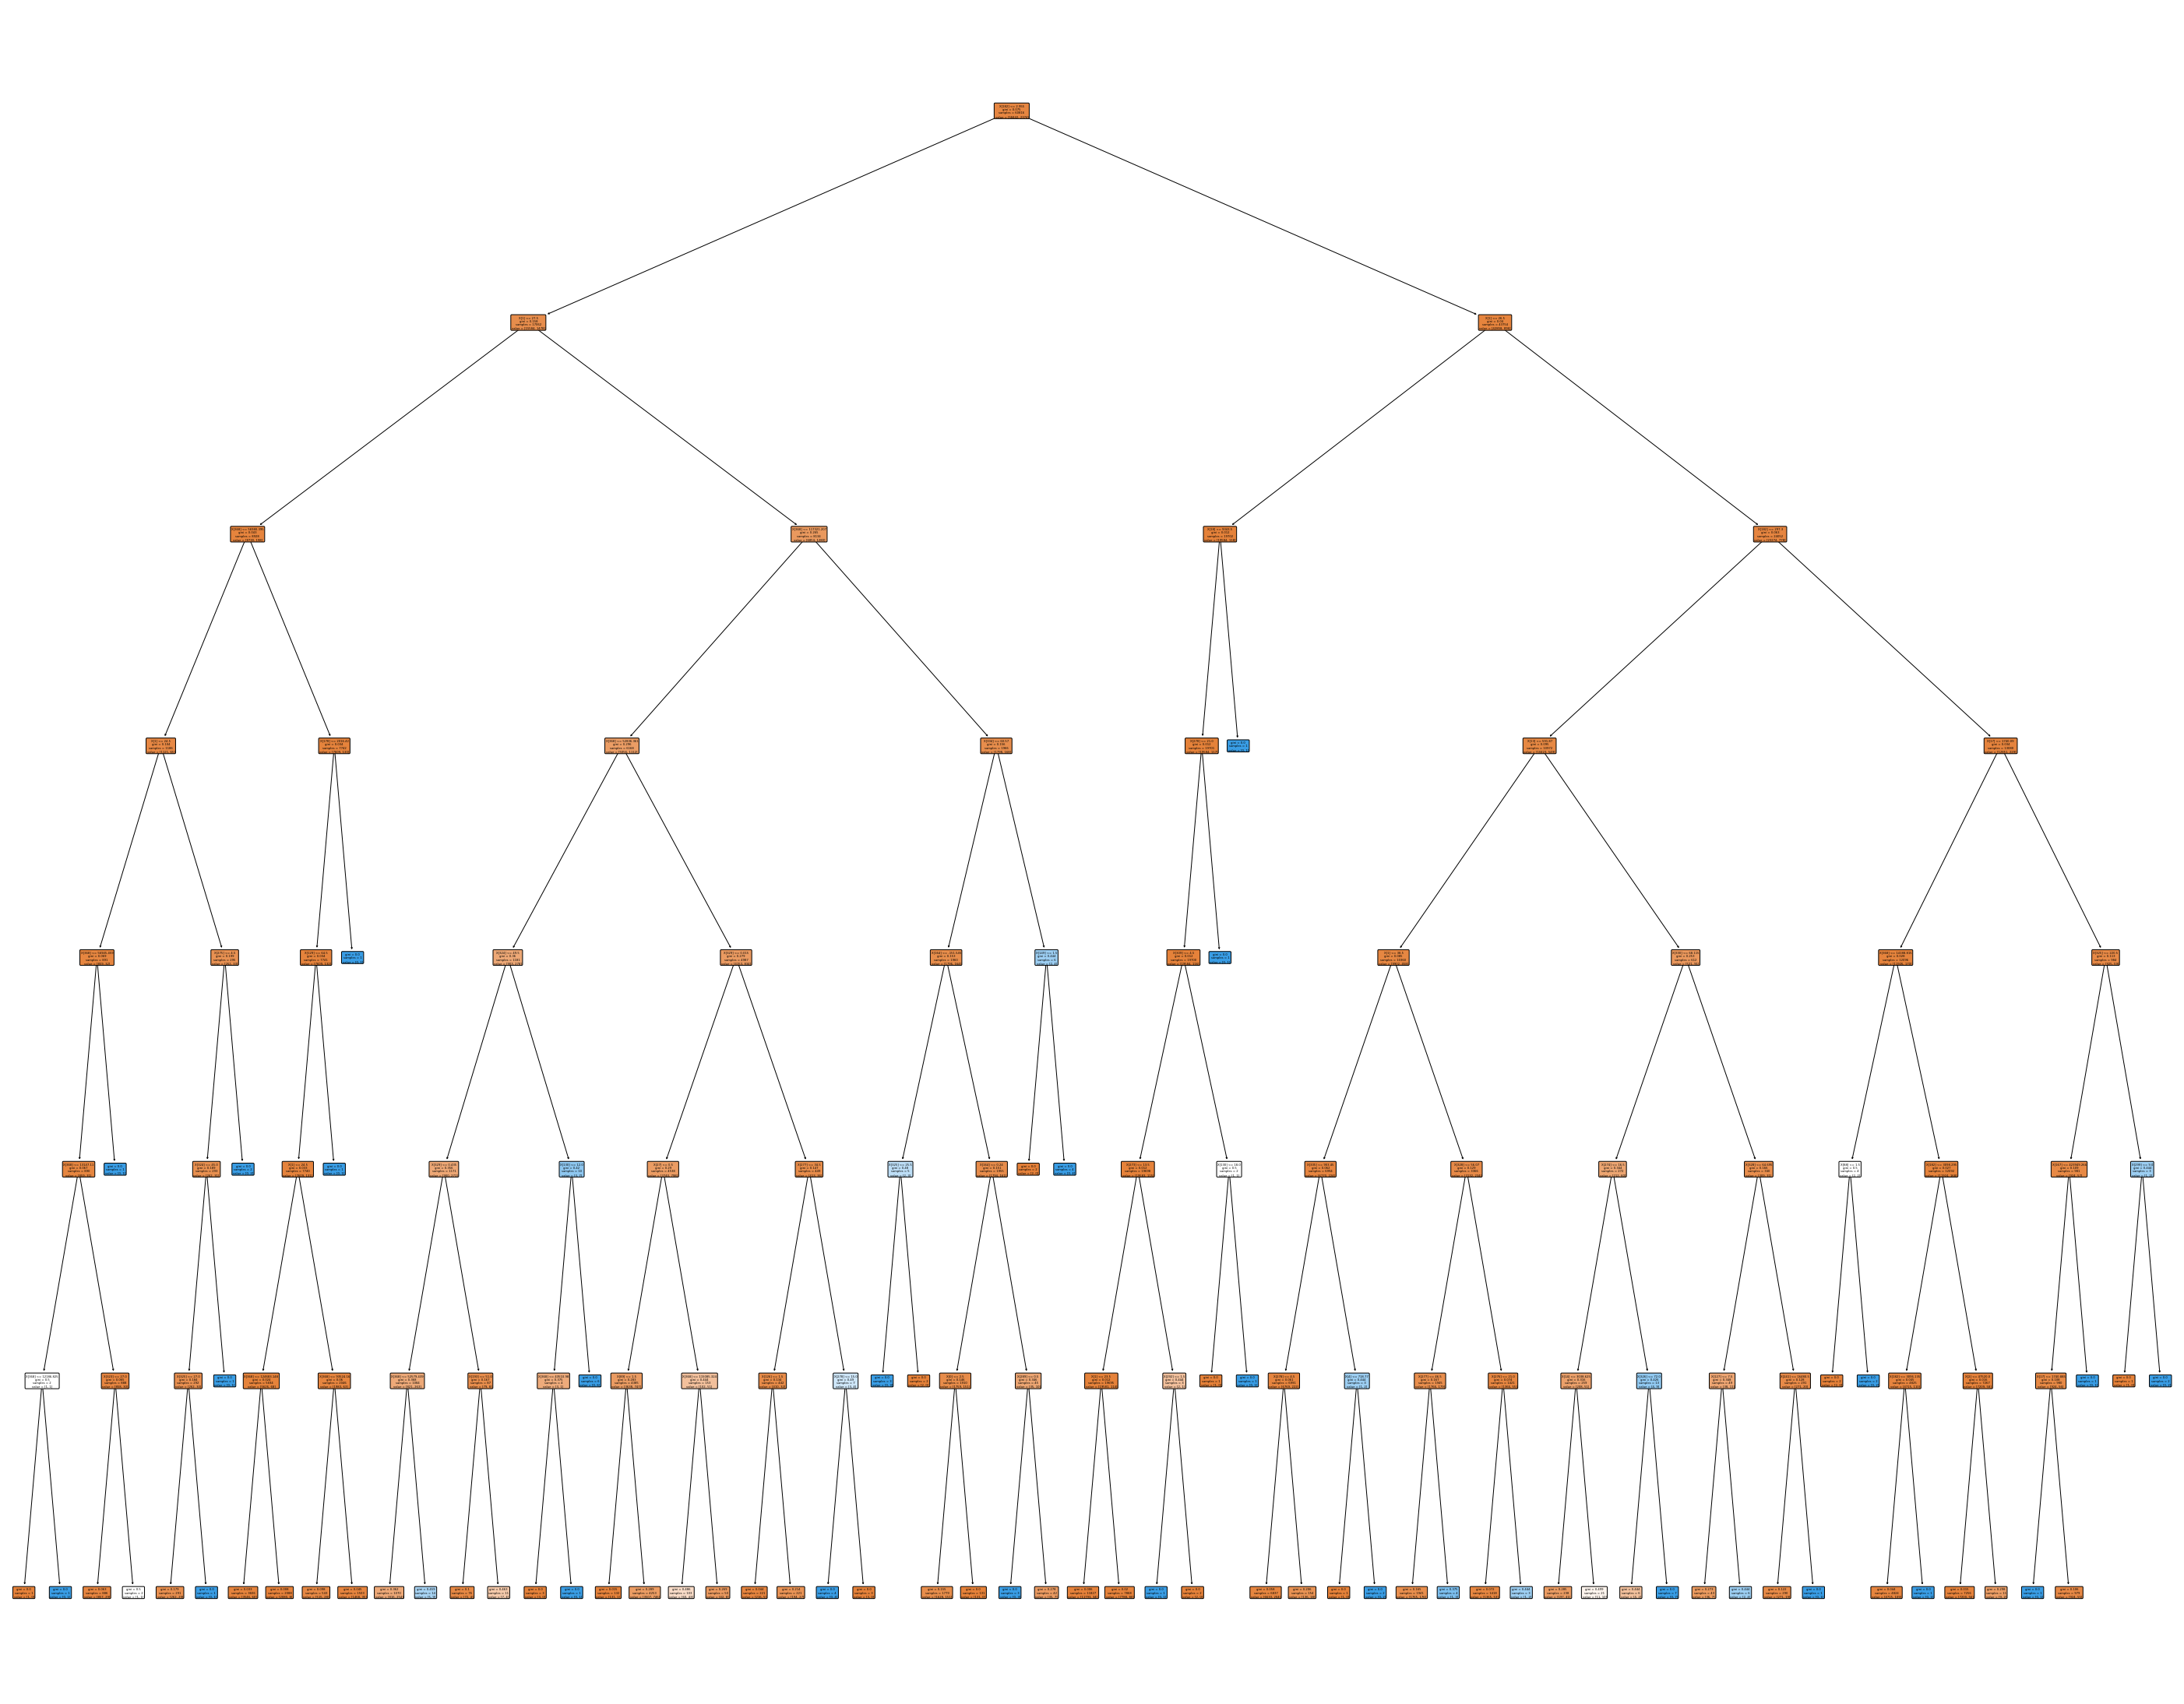

In [18]:
plt.figure( figsize=(50,40) )
tree.plot_tree(model3, 
              #  class_names=cust_df.target_names,
              #  feature_names=cust_df.feature_names,
               impurity=True, filled=True,
               rounded=True) 

* 중요 feature index : 0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


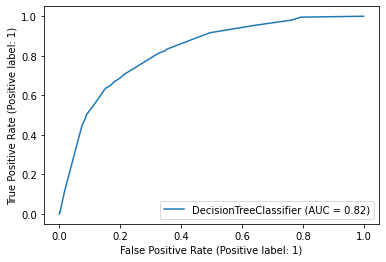

In [19]:
plot_roc_curve(model3, X_test, y_test)  
plt.show()  

# 딥러닝 모델 작성

## DecisionTreeClassifier(max_depth=3)

In [20]:
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense

X4_train = X_train.iloc[:, [1, 182, 278, 368]]

model4 = Sequential()
model4.add(Dense(20, activation='relu', input_dim=4))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4.fit(X4_train, y_train, epochs=1, batch_size=20)

3041/3041 [==============================] - 5s 1ms/step - loss: 60.5644 - accuracy: 0.9308


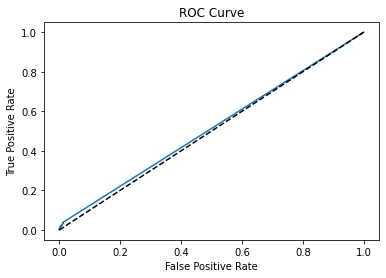

0.5130499665489564

<Figure size 432x288 with 0 Axes>

In [21]:
# 결과 - ROC 곡선
from sklearn.metrics import roc_curve

y_test_pred_probs = model4.predict(X_test.iloc[:, [1, 182, 278, 368]])
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()
metrics.auc(FPR, TPR)

### EarlyStopping 적용

In [22]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.models import load_model

MODEL_DIR = './model/' # 내 드라이브 안이 아니라 드라이브 마운트의 model 폴더에 저장
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR) # 모델을 다 저장

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5) # val_loss를 모니터, patience로 5회를 지켜 봄
history = model4.fit(X4_train, y_train, validation_data=(X_test.iloc[:, [1, 182, 278, 368]], y_test), epochs=20, batch_size=20, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 26.43114, saving model to ./model/01-26.4311.hdf5

Epoch 2: val_loss improved from 26.43114 to 6.19983, saving model to ./model/02-6.1998.hdf5

Epoch 3: val_loss did not improve from 6.19983

Epoch 4: val_loss did not improve from 6.19983

Epoch 5: val_loss did not improve from 6.19983

Epoch 6: val_loss did not improve from 6.19983

Epoch 7: val_loss did not improve from 6.19983


In [24]:
# 모델 가져오기
model4 = load_model('/content/model/02-6.1998.hdf5') # 0.70

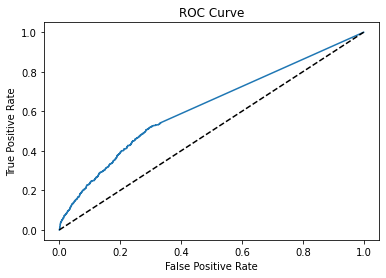

0.6221917903128377

<Figure size 432x288 with 0 Axes>

In [25]:
# 결과 - ROC 곡선
from sklearn.metrics import roc_curve

y_test_pred_probs = model4.predict(X_test.iloc[:, [1, 182, 278, 368]])
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()
metrics.auc(FPR, TPR)

## DecisionTreeClassifier(max_depth=5)

In [26]:
X5_train = X_train.iloc[:, [1, 13, 164, 178, 182, 240, 274, 275, 297, 309, 323, 324, 325, 329, 330, 334, 368]]

model5 = Sequential()
model5.add(Dense(60, activation='relu', input_dim=17)) 
model5.add(Dense(1, activation='sigmoid'))
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model5.fit(X5_train, y_train, epochs=5, batch_size=20) 

Epoch 1/5
3041/3041 [==============================] - 7s 2ms/step - loss: 79.6963 - accuracy: 0.9273
Epoch 2/5
3041/3041 [==============================] - 5s 2ms/step - loss: 33.2111 - accuracy: 0.9242
Epoch 3/5
3041/3041 [==============================] - 5s 2ms/step - loss: 37.7729 - accuracy: 0.9242
Epoch 4/5
3041/3041 [==============================] - 5s 1ms/step - loss: 26.4172 - accuracy: 0.9230
Epoch 5/5
3041/3041 [==============================] - 5s 2ms/step - loss: 25.6954 - accuracy: 0.9225


In [27]:
model5.predict(X_test.iloc[:, [1, 13, 164, 178, 182, 240, 274, 275, 297, 309, 323, 324, 325, 329, 330, 334, 368]])

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

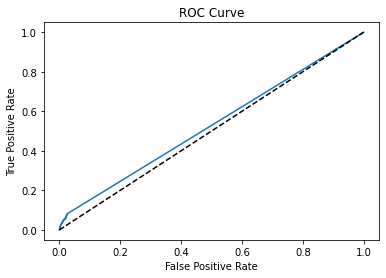

0.527818277476947

<Figure size 432x288 with 0 Axes>

In [28]:
# 결과 - ROC 곡선
from sklearn.metrics import roc_curve

y_test_pred_probs = model5.predict(X_test.iloc[:, [1, 13, 164, 178, 182, 240, 274, 275, 297, 309, 323, 324, 325, 329, 330, 334, 368]])
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()
metrics.auc(FPR, TPR)

### EarlyStopping 적용

In [29]:
MODEL_DIR = './model/' # 내 드라이브 안이 아니라 드라이브 마운트의 model 폴더에 저장
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR) # 모델을 다 저장

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5) # val_loss를 모니터, patience로 5회를 지켜 봄
history = model5.fit(X_train.iloc[:, [1, 13, 164, 178, 182, 240, 274, 275, 297, 309, 323, 324, 325, 329, 330, 334, 368]], y_train, validation_data=(X_test.iloc[:, [1, 13, 164, 178, 182, 240, 274, 275, 297, 309, 323, 324, 325, 329, 330, 334, 368]], y_test), epochs=30, batch_size=20, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 57.67988, saving model to ./model/01-57.6799.hdf5

Epoch 2: val_loss did not improve from 57.67988

Epoch 3: val_loss improved from 57.67988 to 7.08927, saving model to ./model/03-7.0893.hdf5

Epoch 4: val_loss did not improve from 7.08927

Epoch 5: val_loss did not improve from 7.08927

Epoch 6: val_loss improved from 7.08927 to 3.99187, saving model to ./model/06-3.9919.hdf5

Epoch 7: val_loss did not improve from 3.99187

Epoch 8: val_loss did not improve from 3.99187

Epoch 9: val_loss did not improve from 3.99187

Epoch 10: val_loss did not improve from 3.99187

Epoch 11: val_loss did not improve from 3.99187


In [30]:
# 모델 가져오기
model5 = load_model('/content/model/06-3.9919.hdf5')

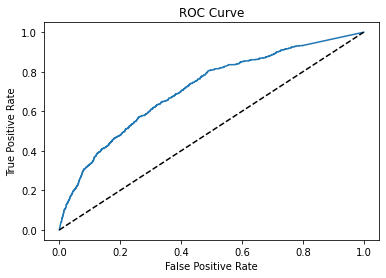

0.7115738986595765

<Figure size 432x288 with 0 Axes>

In [31]:
# 결과 - ROC 곡선
from sklearn.metrics import roc_curve

y_test_pred_probs = model5.predict(X_test.iloc[:, [1, 13, 164, 178, 182, 240, 274, 275, 297, 309, 323, 324, 325, 329, 330, 334, 368]])
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()
metrics.auc(FPR, TPR)

## DecisionTreeClassifier(max_depth=7)

In [32]:
X6_train = X_train.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]]

model6 = Sequential()
model6.add(Dense(50, activation='relu', input_dim=43)) 
model6.add(Dense(1, activation='sigmoid'))
model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model6.fit(X6_train, y_train, epochs=1, batch_size=20)

3041/3041 [==============================] - 5s 2ms/step - loss: 45.7592 - accuracy: 0.9251


In [33]:
model6.predict(X_test.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]])

array([[1.0944851e-08],
       [3.7637627e-01],
       [0.0000000e+00],
       ...,
       [0.0000000e+00],
       [1.0000000e+00],
       [1.5988286e-14]], dtype=float32)

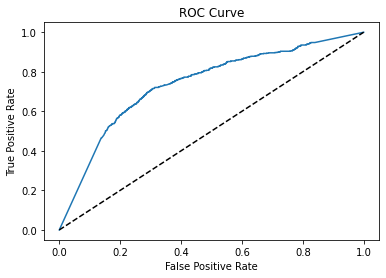

0.7384966299968173

<Figure size 432x288 with 0 Axes>

In [34]:
# 결과 - ROC 곡선
from sklearn.metrics import roc_curve

y_test_pred_probs = model6.predict(X_test.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]])
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()
metrics.auc(FPR, TPR)

### EarlyStopping 적용

In [35]:
MODEL_DIR = './model/' # 내 드라이브 안이 아니라 드라이브 마운트의 model 폴더에 저장
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR) # 모델을 다 저장

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5) # val_loss를 모니터, patience로 5회를 지켜 봄
history = model6.fit(X_train.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]], y_train, validation_data=(X_test.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]], y_test), epochs=50, batch_size=20, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 30.75737, saving model to ./model/01-30.7574.hdf5

Epoch 2: val_loss improved from 30.75737 to 13.91827, saving model to ./model/02-13.9183.hdf5

Epoch 3: val_loss improved from 13.91827 to 6.12921, saving model to ./model/03-6.1292.hdf5

Epoch 4: val_loss did not improve from 6.12921

Epoch 5: val_loss improved from 6.12921 to 4.42908, saving model to ./model/05-4.4291.hdf5

Epoch 6: val_loss improved from 4.42908 to 3.10718, saving model to ./model/06-3.1072.hdf5

Epoch 7: val_loss did not improve from 3.10718

Epoch 8: val_loss did not improve from 3.10718

Epoch 9: val_loss did not improve from 3.10718

Epoch 10: val_loss did not improve from 3.10718

Epoch 11: val_loss improved from 3.10718 to 2.53226, saving model to ./model/11-2.5323.hdf5

Epoch 12: val_loss did not improve from 2.53226

Epoch 13: val_loss did not improve from 2.53226

Epoch 14: val_loss did not improve from 2.53226

Epoch 15: val_loss did not improve from 2.53226

Epoch 1

In [36]:
# 모델 가져오기
model6 = load_model('/content/model/11-2.5323.hdf5') # 0.76

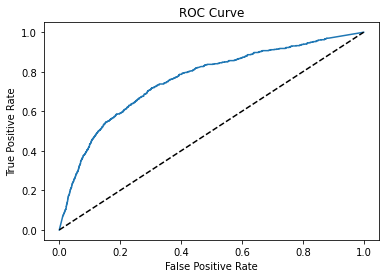

0.7601388597199639

<Figure size 432x288 with 0 Axes>

In [37]:
# 결과 - ROC 곡선
from sklearn.metrics import roc_curve

y_test_pred_probs = model6.predict(X_test.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]])
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()
metrics.auc(FPR, TPR)

## 모든 feature를 집어넣은 딥러닝 모델

In [38]:
model7 = Sequential()
model7.add(Dense(600, activation='relu', input_dim=369))
model7.add(Dense(400, activation='relu'))
model7.add(Dense(200, activation='relu'))
model7.add(Dense(1, activation='sigmoid'))
model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model7.fit(X_train, y_train, epochs=1, batch_size=20) # epochs = 반복횟수, 횟수로 반복하면 마지막 모델이 저장된다고 함

3041/3041 [==============================] - 17s 6ms/step - loss: 495367.6562 - accuracy: 0.9321


In [39]:
model7.predict(X_test)

array([[0.0347423 ],
       [0.0245727 ],
       [0.        ],
       ...,
       [0.        ],
       [0.04546756],
       [0.01067448]], dtype=float32)

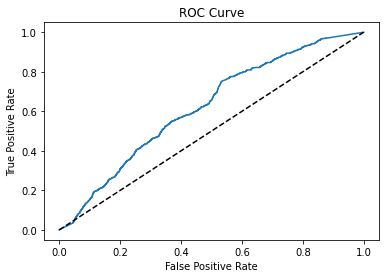

0.6210273908835623

<Figure size 432x288 with 0 Axes>

In [40]:
# 결과 - ROC 곡선
y_test_pred_probs = model7.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()
metrics.auc(FPR, TPR)

### EarlyStopping 적용

In [41]:
MODEL_DIR = './model/' # 내 드라이브 안이 아니라 드라이브 마운트의 model 폴더에 저장
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR) # 모델을 다 저장

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5) # val_loss를 모니터, patience로 5회를 지켜 봄
history = model7.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=20, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 416526.68750, saving model to ./model/01-416526.6875.hdf5

Epoch 2: val_loss improved from 416526.68750 to 217395.28125, saving model to ./model/02-217395.2812.hdf5

Epoch 3: val_loss did not improve from 217395.28125

Epoch 4: val_loss did not improve from 217395.28125

Epoch 5: val_loss did not improve from 217395.28125

Epoch 6: val_loss did not improve from 217395.28125

Epoch 7: val_loss did not improve from 217395.28125


In [42]:
# 모델 가져오기
model7 = load_model('/content/model/02-217395.2812.hdf5')

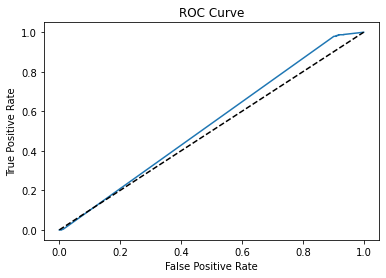

0.5340153809846515

<Figure size 432x288 with 0 Axes>

In [43]:
# 결과 - ROC 곡선
from sklearn.metrics import roc_curve

y_test_pred_probs = model7.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()
metrics.auc(FPR, TPR)

## 결론 
* AUC가 가장 높은 DecisionTreeClassifier(max_depth=7)에 EarlyStopping 적용한 모델을 선정(AUC = 0.7601)

# 선정한 모델 최적화

## optimizer 변경

### RMSprop

In [57]:
X6_train = X_train.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]]

model6 = Sequential()
model6.add(Dense(50, activation='relu', input_dim=43)) 
model6.add(Dense(1, activation='sigmoid'))
model6.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
MODEL_DIR = './model/' # 내 드라이브 안이 아니라 드라이브 마운트의 model 폴더에 저장
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR) # 모델을 다 저장

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=7) # val_loss를 모니터, patience로 7회를 지켜 봄
history = model6.fit(X_train.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]], y_train, validation_data=(X_test.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]], y_test), epochs=50, batch_size=20, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 19.50410, saving model to ./model/01-19.5041.hdf5

Epoch 2: val_loss did not improve from 19.50410

Epoch 3: val_loss did not improve from 19.50410

Epoch 4: val_loss improved from 19.50410 to 18.15286, saving model to ./model/04-18.1529.hdf5

Epoch 5: val_loss did not improve from 18.15286

Epoch 6: val_loss did not improve from 18.15286

Epoch 7: val_loss improved from 18.15286 to 13.63056, saving model to ./model/07-13.6306.hdf5

Epoch 8: val_loss did not improve from 13.63056

Epoch 9: val_loss did not improve from 13.63056

Epoch 10: val_loss improved from 13.63056 to 9.91460, saving model to ./model/10-9.9146.hdf5

Epoch 11: val_loss did not improve from 9.91460

Epoch 12: val_loss did not improve from 9.91460

Epoch 13: val_loss did not improve from 9.91460

Epoch 14: val_loss improved from 9.91460 to 6.71073, saving model to ./model/14-6.7107.hdf5

Epoch 15: val_loss improved from 6.71073 to 5.57823, saving model to ./model/15-5.5782.hdf5

In [59]:
# 모델 가져오기
model6 = load_model('/content/model/19-4.6808.hdf5') 

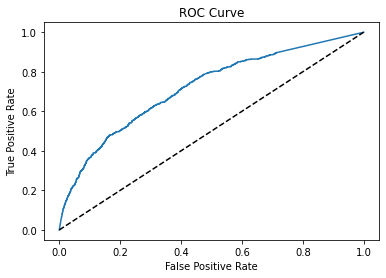

0.7174427705691441

<Figure size 432x288 with 0 Axes>

In [60]:
# 결과 - ROC 곡선
from sklearn.metrics import roc_curve

y_test_pred_probs = model6.predict(X_test.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]])
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()
metrics.auc(FPR, TPR)

### Adagrad

In [61]:
X6_train = X_train.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]]

model6 = Sequential()
model6.add(Dense(50, activation='relu', input_dim=43)) 
model6.add(Dense(1, activation='sigmoid'))
model6.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
MODEL_DIR = './model/' # 내 드라이브 안이 아니라 드라이브 마운트의 model 폴더에 저장
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR) # 모델을 다 저장

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=7) # val_loss를 모니터, patience로 7회를 지켜 봄
history = model6.fit(X_train.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]], y_train, validation_data=(X_test.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]], y_test), epochs=80, batch_size=20, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 4.76286, saving model to ./model/01-4.7629.hdf5

Epoch 2: val_loss improved from 4.76286 to 4.71591, saving model to ./model/02-4.7159.hdf5

Epoch 3: val_loss improved from 4.71591 to 4.70176, saving model to ./model/03-4.7018.hdf5

Epoch 4: val_loss improved from 4.70176 to 4.68664, saving model to ./model/04-4.6866.hdf5

Epoch 5: val_loss improved from 4.68664 to 4.67392, saving model to ./model/05-4.6739.hdf5

Epoch 6: val_loss improved from 4.67392 to 4.65848, saving model to ./model/06-4.6585.hdf5

Epoch 7: val_loss did not improve from 4.65848

Epoch 8: val_loss improved from 4.65848 to 4.62934, saving model to ./model/08-4.6293.hdf5

Epoch 9: val_loss improved from 4.62934 to 4.61474, saving model to ./model/09-4.6147.hdf5

Epoch 10: val_loss improved from 4.61474 to 4.59768, saving model to ./model/10-4.5977.hdf5

Epoch 11: val_loss improved from 4.59768 to 4.57781, saving model to ./model/11-4.5778.hdf5

Epoch 12: val_loss improved from 

In [69]:
# 모델 가져오기
# model6 = load_model('/content/model/80-4.7568.hdf5') # 0.71
model6 = load_model('/content/model/80-3.7518.hdf5') #

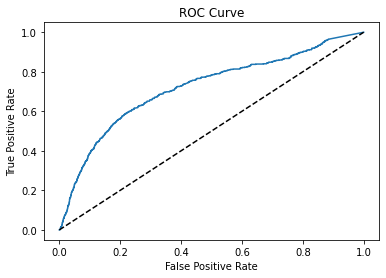

0.7191554315184608

<Figure size 432x288 with 0 Axes>

In [70]:
# 결과 - ROC 곡선
from sklearn.metrics import roc_curve

y_test_pred_probs = model6.predict(X_test.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]])
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()
metrics.auc(FPR, TPR)

### 결론
* PMSprop과 Adagrad는 유사한 AUC가 나타남을 알 수 있다(AUC = 0.71)
* Adam, PMSprop, Adagrad 중에는 Adam이 가장 높음을 확인할 수 있었다(Adam AUC = 0.7601)

## L1, L2, L1-L2 규제

### L1 규제

In [52]:
from tensorflow.keras import regularizers

In [71]:
X6_train = X_train.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]]

model6 = Sequential()
model6.add(Dense(50, activation='relu', input_dim=43, kernel_regularizer=regularizers.l1(0.001))) 
model6.add(Dense(1, activation='sigmoid'))
model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
MODEL_DIR = './model/' # 내 드라이브 안이 아니라 드라이브 마운트의 model 폴더에 저장
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR) # 모델을 다 저장

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=7) # val_loss를 모니터, patience로 7회를 지켜 봄
history = model6.fit(X_train.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]], y_train, validation_data=(X_test.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]], y_test), epochs=50, batch_size=20, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 58.83178, saving model to ./model/01-58.8318.hdf5

Epoch 2: val_loss did not improve from 58.83178

Epoch 3: val_loss did not improve from 58.83178

Epoch 4: val_loss improved from 58.83178 to 19.56234, saving model to ./model/04-19.5623.hdf5

Epoch 5: val_loss did not improve from 19.56234

Epoch 6: val_loss did not improve from 19.56234

Epoch 7: val_loss improved from 19.56234 to 8.09025, saving model to ./model/07-8.0903.hdf5

Epoch 8: val_loss did not improve from 8.09025

Epoch 9: val_loss did not improve from 8.09025

Epoch 10: val_loss improved from 8.09025 to 7.94454, saving model to ./model/10-7.9445.hdf5

Epoch 11: val_loss did not improve from 7.94454

Epoch 12: val_loss did not improve from 7.94454

Epoch 13: val_loss did not improve from 7.94454

Epoch 14: val_loss improved from 7.94454 to 7.09899, saving model to ./model/14-7.0990.hdf5

Epoch 15: val_loss did not improve from 7.09899

Epoch 16: val_loss did not improve from 7.09899

In [81]:
# 모델 가져오기
model6 = load_model('/content/model/34-1.3637.hdf5') # 0.74

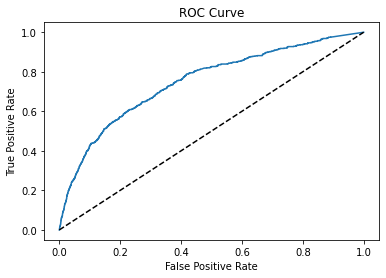

0.7484384641532555

<Figure size 432x288 with 0 Axes>

In [82]:
# 결과 - ROC 곡선
from sklearn.metrics import roc_curve

y_test_pred_probs = model6.predict(X_test.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]])
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()
metrics.auc(FPR, TPR)

### L2 규제

In [83]:
X6_train = X_train.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]]

model6 = Sequential()
model6.add(Dense(50, activation='relu', input_dim=43, kernel_regularizer=regularizers.l2(0.001))) 
model6.add(Dense(1, activation='sigmoid'))
model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
MODEL_DIR = './model/' # 내 드라이브 안이 아니라 드라이브 마운트의 model 폴더에 저장
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR) # 모델을 다 저장

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10) # val_loss를 모니터, patience로 10회를 지켜 봄
history = model6.fit(X_train.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]], y_train, validation_data=(X_test.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]], y_test), epochs=50, batch_size=20, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 20.04830, saving model to ./model/01-20.0483.hdf5

Epoch 2: val_loss did not improve from 20.04830

Epoch 3: val_loss improved from 20.04830 to 8.71495, saving model to ./model/03-8.7150.hdf5

Epoch 4: val_loss did not improve from 8.71495

Epoch 5: val_loss did not improve from 8.71495

Epoch 6: val_loss did not improve from 8.71495

Epoch 7: val_loss did not improve from 8.71495

Epoch 8: val_loss improved from 8.71495 to 8.48794, saving model to ./model/08-8.4879.hdf5

Epoch 9: val_loss improved from 8.48794 to 6.74536, saving model to ./model/09-6.7454.hdf5

Epoch 10: val_loss improved from 6.74536 to 5.91825, saving model to ./model/10-5.9182.hdf5

Epoch 11: val_loss did not improve from 5.91825

Epoch 12: val_loss did not improve from 5.91825

Epoch 13: val_loss did not improve from 5.91825

Epoch 14: val_loss did not improve from 5.91825

Epoch 15: val_loss improved from 5.91825 to 4.90105, saving model to ./model/15-4.9011.hdf5

Epoch 16:

In [95]:
# 모델 가져오기
model6 = load_model('/content/model/30-1.4379.hdf5') # 0.70

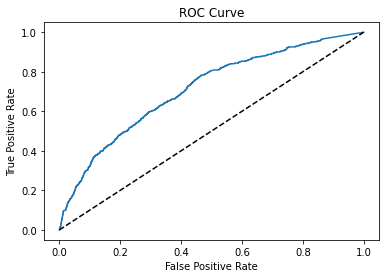

0.7099843245595613

<Figure size 432x288 with 0 Axes>

In [96]:
# 결과 - ROC 곡선
from sklearn.metrics import roc_curve

y_test_pred_probs = model6.predict(X_test.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]])
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()
metrics.auc(FPR, TPR)

### L1-L2 규제

In [97]:
X6_train = X_train.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]]

model6 = Sequential()
model6.add(Dense(50, activation='relu', input_dim=43, kernel_regularizer=regularizers.l1_l2(0.001))) 
model6.add(Dense(1, activation='sigmoid'))
model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [98]:
MODEL_DIR = './model/' # 내 드라이브 안이 아니라 드라이브 마운트의 model 폴더에 저장
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR) # 모델을 다 저장

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10) # val_loss를 모니터, patience로 10회를 지켜 봄
history = model6.fit(X_train.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]], y_train, validation_data=(X_test.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]], y_test), epochs=50, batch_size=20, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 33.40126, saving model to ./model/01-33.4013.hdf5

Epoch 2: val_loss improved from 33.40126 to 31.75625, saving model to ./model/02-31.7563.hdf5

Epoch 3: val_loss did not improve from 31.75625

Epoch 4: val_loss improved from 31.75625 to 22.37293, saving model to ./model/04-22.3729.hdf5

Epoch 5: val_loss improved from 22.37293 to 17.25018, saving model to ./model/05-17.2502.hdf5

Epoch 6: val_loss did not improve from 17.25018

Epoch 7: val_loss improved from 17.25018 to 7.20368, saving model to ./model/07-7.2037.hdf5

Epoch 8: val_loss did not improve from 7.20368

Epoch 9: val_loss did not improve from 7.20368

Epoch 10: val_loss did not improve from 7.20368

Epoch 11: val_loss did not improve from 7.20368

Epoch 12: val_loss did not improve from 7.20368

Epoch 13: val_loss did not improve from 7.20368

Epoch 14: val_loss did not improve from 7.20368

Epoch 15: val_loss did not improve from 7.20368

Epoch 16: val_loss improved from 7.20368 to

In [109]:
# 모델 가져오기
model6 = load_model('/content/model/25-2.8259.hdf5') # 0.64

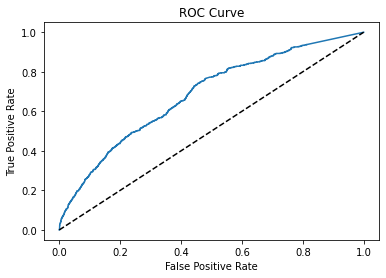

0.6843488088613872

<Figure size 432x288 with 0 Axes>

In [110]:
# 결과 - ROC 곡선
from sklearn.metrics import roc_curve

y_test_pred_probs = model6.predict(X_test.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]])
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()
metrics.auc(FPR, TPR)

### 결론
* L1 규제를 한 모델의 AUC가 0.74로 가장 높음을 알 수 있다
* L2, L1-L2 규제를 한 모델의 AUC는 각각 0.70, 0.68가 나왔음을 알 수 있다
* 따라서 규제를 하지 않는 모델이 가장 높은 AUC가 나옴을 알 수 있다(0.76)

# 최종결론
* 딥러닝 모델 중에서는, 규제를 적용하지 않고 EarlyStopping 적용한 DecisionTreeClassifier(max_depth=7) 모델이 가장 높은 AUC(0.76)을 나타내여, 최종 모델로 선정하였다
* 딥러닝 모델을 제외했을 때, DesicionTreeClassifer(max_depth=7) 모델의 AUC가 0.82이므로 딥러닝 모델보다 성능이 좋음을 알 수 있다

## 최종 딥러닝 모델

In [112]:
# 모델 가져오기
model6 = load_model('/content/model/11-2.5323.hdf5') # 0.76

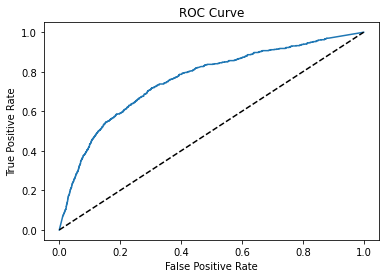

0.7601388597199639

<Figure size 432x288 with 0 Axes>

In [113]:
# 결과 - ROC 곡선
from sklearn.metrics import roc_curve

y_test_pred_probs = model6.predict(X_test.iloc[:, [0, 1, 2, 4, 13, 14, 17, 18, 27, 88, 89, 103, 126, 127, 128, 129, 130, 149, 164, 167, 182, 193, 241, 273, 274, 275, 276, 277, 278, 289, 292, 299, 309, 323, 324, 325, 326, 328, 329, 330, 334, 335, 368]])
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()
metrics.auc(FPR, TPR)

## 최종 DesicionTree 모델

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


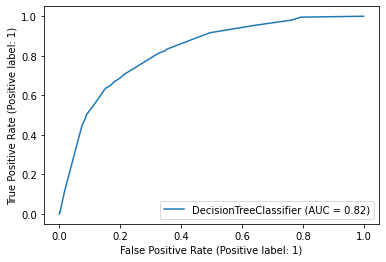

In [114]:
plot_roc_curve(model3, X_test, y_test)  
plt.show()  